In [45]:
#import pandas as pd
#from sklearn.metrics import ConfusionMatrixDisplay
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import classification_report

#from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
#from sklearn.preprocessing import StandardScaler
#from tqdm import tqdm

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
data= pd.read_csv('D:\\SMUMSDS\\QuantWorld\\CS5\\log2.csv')
data

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18
...,...,...,...,...,...,...,...,...,...,...,...,...
65527,63691,80,13237,80,allow,314,192,122,6,15,4,2
65528,50964,80,13485,80,allow,4680740,67312,4613428,4675,77,985,3690
65529,54871,445,0,0,drop,70,70,0,1,0,1,0
65530,54870,445,0,0,drop,70,70,0,1,0,1,0


In [4]:
data['Action'].value_counts()

allow         37640
deny          14987
drop          12851
reset-both       54
Name: Action, dtype: int64

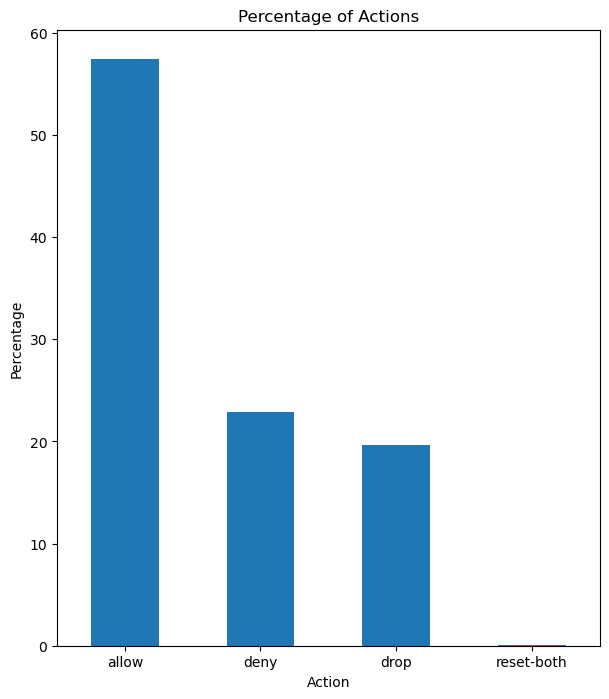

allow         57.437588
deny          22.869743
drop          19.610267
reset-both     0.082402
Name: Action, dtype: float64


In [5]:
# Compute the frequency of each color value and divide by the total count to get percentages
counts = data['Action'].value_counts(normalize=True) * 100

# Set Fig Size
fig, ax = plt.subplots(figsize=(7, 8))

# Create a bar plot of the result
ax = counts.plot(kind='bar', rot=0)

# Add labels and a title to the plot
ax.set_xlabel('Action')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Actions')


# Display the plot
plt.show()
print(counts)

In [6]:
data.memory_usage().sum()

6291200

### Convert Columns to uint32

In [7]:
%%time
for i in data.columns:
    if i in ['Bytes', 'Bytes Sent', 'Bytes Received', 'Packets', 
             'Elapsed Time (sec)', 'pkts_sent', 'pkts_received']:
        data[i]=data[i].astype('uint32')

Wall time: 14.7 ms


In [8]:
data.memory_usage().sum()

4456304

In [9]:
%%time
for i in ['Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port']:
    data= data.join(pd.get_dummies(data[i],prefix=i, dtype=bool))

Wall time: 19.5 s


In [10]:
%%time
# create dummies and check for duplicates
for i in ['Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port']:
    dummies = pd.get_dummies(data[i], prefix=i)
    duplicates = dummies.columns[dummies.columns.duplicated()]

    if duplicates.empty:
        print(f'No duplicate columns for {i}.')
    else:
        print(f'Duplicate columns for {i}: {duplicates.to_list()}')

No duplicate columns for Source Port.
No duplicate columns for Destination Port.
No duplicate columns for NAT Source Port.
No duplicate columns for NAT Destination Port.
Wall time: 12.4 s


In [11]:
data

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),...,NAT Destination Port_64932,NAT Destination Port_65054,NAT Destination Port_65100,NAT Destination Port_65128,NAT Destination Port_65253,NAT Destination Port_65264,NAT Destination Port_65387,NAT Destination Port_65427,NAT Destination Port_65534,NAT Destination Port_65535
0,57222,53,54587,53,allow,177,94,83,2,30,...,False,False,False,False,False,False,False,False,False,False
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,...,False,False,False,False,False,False,False,False,False,False
2,6881,50321,43265,50321,allow,238,118,120,2,1199,...,False,False,False,False,False,False,False,False,False,False
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,...,False,False,False,False,False,False,False,False,False,False
4,50002,443,45848,443,allow,25358,6778,18580,31,16,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65527,63691,80,13237,80,allow,314,192,122,6,15,...,False,False,False,False,False,False,False,False,False,False
65528,50964,80,13485,80,allow,4680740,67312,4613428,4675,77,...,False,False,False,False,False,False,False,False,False,False
65529,54871,445,0,0,drop,70,70,0,1,0,...,False,False,False,False,False,False,False,False,False,False
65530,54870,445,0,0,drop,70,70,0,1,0,...,False,False,False,False,False,False,False,False,False,False


In [12]:
data.shape

(65532, 57694)

In [13]:
y=pd.factorize(data['Action'])
y

(array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 Index(['allow', 'drop', 'deny', 'reset-both'], dtype='object'))

In [14]:
data = data.drop(['Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port', 'Action'], axis=1)

In [15]:
data.memory_usage()

Index                            128
Bytes                         262128
Bytes Sent                    262128
Bytes Received                262128
Packets                       262128
                               ...  
NAT Destination Port_65264     65532
NAT Destination Port_65387     65532
NAT Destination Port_65427     65532
NAT Destination Port_65534     65532
NAT Destination Port_65535     65532
Length: 57690, dtype: int64

In [16]:
data.memory_usage().sum()

3781851848

In [17]:
print(data.dtypes)

Bytes                         uint32
Bytes Sent                    uint32
Bytes Received                uint32
Packets                       uint32
Elapsed Time (sec)            uint32
                               ...  
NAT Destination Port_65264      bool
NAT Destination Port_65387      bool
NAT Destination Port_65427      bool
NAT Destination Port_65534      bool
NAT Destination Port_65535      bool
Length: 57689, dtype: object


### Remove Duplicate Columns After Dummy Creation
#### 2,731 Columns Removed

In [18]:
%%time  
# Destination Port== Nat Destination Port
# filter columns that have 'Destination Port' in their name
dest_port_cols = data.filter(regex='Destination Port')

# Identify duplicate columns
dup_cols = dest_port_cols.columns[dest_port_cols.T.duplicated()].tolist()
# Combine the duplicates
dest_port_cols = dest_port_cols.T.drop_duplicates().T

# Print the list of dropped columns
dropped_cols = list(set(dup_cols) - set(dest_port_cols.columns))
# drop columns from the DataFrame
data = data.drop(columns=dropped_cols)
data.shape

Wall time: 1min 27s
Parser   : 406 ms


(65532, 55215)

In [19]:
%%time  
# Source Port== Destination Port
# filter columns that start with 'Source Port' or 'Destination Port'
filtered_cols = data.filter(regex='^(Source Port|Destination Port)')
# Identify duplicate columns
dup_cols = filtered_cols.columns[filtered_cols.T.duplicated()].tolist()
# Combine the duplicates
filtered_cols = filtered_cols.T.drop_duplicates().T
# Print the list of dropped columns
dropped_cols = list(set(dup_cols) - set(filtered_cols.columns))
# drop columns from the DataFrame
data = data.drop(columns=dropped_cols)
data.shape

Wall time: 8min 9s


(65532, 54971)

In [20]:
%%time  
# NAT Source== NAT Destination
# filter columns that start with 'NAT Destination' or 'NAT Source'
filtered_cols = data.filter(regex='^(NAT Destination|NAT Source)')
# Identify duplicate columns
dup_cols = filtered_cols.columns[filtered_cols.T.duplicated()].tolist()
# Combine the duplicates
filtered_cols = filtered_cols.T.drop_duplicates().T
# Print the list of dropped columns
dropped_cols = list(set(dup_cols) - set(filtered_cols.columns))
# drop columns from the DataFrame
data = data.drop(columns=dropped_cols)
data.shape

Wall time: 10min 18s
Parser   : 102 ms


(65532, 54958)

In [21]:
data.memory_usage().sum()

3602883956

### Save Transform Data

In [22]:
import pickle

# Save the DataFrame to a file
with open('data.pickle', 'wb') as f:
    pickle.dump(data, f)

In [23]:
# Save the Y to a file
with open('y.pickle', 'wb') as f:
    pickle.dump(y, f)

## Logistic Regression

### Create Sparse Data Frame 

In [24]:
%%time
sparse_float_dtype = pd.SparseDtype("float", fill_value=0)
sparse_df = data.astype(sparse_float_dtype)
sparse_df.shape

Wall time: 23.9 s
Parser   : 1.63 s


(65532, 54958)

In [25]:
sparse_df.memory_usage().sum()

7142372

### Train/Test Split Sparse DF 80/20

In [26]:
%%time

#Make sure that the same proportion of labels are present in each of the train and test sets as the full df (Stratify)
x_train, x_test, y_train, y_test = train_test_split(sparse_df,y[0], stratify=y[0], test_size=0.2)

Wall time: 1min 2s
Parser   : 579 ms


In [27]:
%%time

lr=LogisticRegression(n_jobs=4)
lr.fit(x_train, y_train)

Wall time: 31 s


LogisticRegression(n_jobs=4)

In [28]:
%%time
preds = lr.predict(x_test)

Wall time: 2.74 s


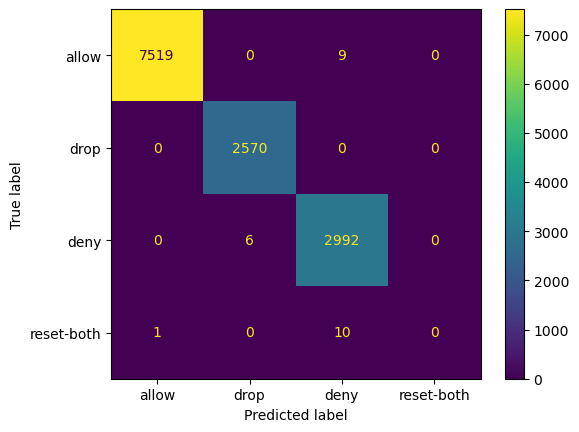

In [29]:
# get the confusion matrix
cm = confusion_matrix(y_test, preds)

# display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y[1])
disp.plot()

In [30]:
print(classification_report(y_test, preds, target_names=y[1], zero_division=0))

              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7528
        drop       1.00      1.00      1.00      2570
        deny       0.99      1.00      1.00      2998
  reset-both       0.00      0.00      0.00        11

    accuracy                           1.00     13107
   macro avg       0.75      0.75      0.75     13107
weighted avg       1.00      1.00      1.00     13107



### Linear SVC

#### Train/Test Split Original Data 80/20

In [46]:
%%time

#Make sure that the same proportion of labels are present in each of the train and test sets as the full df (Stratify)
x_train, x_test, y_train, y_test = train_test_split(data,y[0], stratify=y[0], test_size=0.4)

Wall time: 7.9 s


In [48]:
%%time

linear = LinearSVC(dual=False, class_weight='balanced')
linear.fit(x_train,y_train)

MemoryError: Unable to allocate 16.1 GiB for an array with shape (54958, 39319) and data type object

In [50]:
%%time
preds = linear.predict(x_test)

MemoryError: Unable to allocate 10.7 GiB for an array with shape (54958, 26213) and data type object

In [51]:
# get the confusion matrix
cm = confusion_matrix(y_test, preds)

# display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y[1])
disp.plot()

ValueError: Found input variables with inconsistent numbers of samples: [26213, 13107]

In [ ]:
print(classification_report(y_test, preds, target_names=y[1], zero_division=0))

In [ ]:
data

### SVC

In [ ]:
%%time
# select the boolean columns for training
bool_cols = data.iloc[:, 7:57688]

# select the non-boolean columns for training
non_bool_cols = ['Bytes', 'Bytes Sent', 'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent', 'pkts_received']

# split the data into training and testing sets
X_train_bool, X_test_bool, y_train, y_test = train_test_split(data[bool_cols], y[0], test_size=0.4, stratify=y[0], random_state=42)
X_train_non_bool, X_test_non_bool, _, _ = train_test_split(data[non_bool_cols], y[0], test_size=0.4, stratify=y[0], random_state=42)

# create a StandardScaler object and fit on the non-boolean training set only
scaler = StandardScaler()
scaler.fit(X_train_non_bool)

# transform the non-boolean training and testing sets using the scaler
X_train_non_bool_scaled = scaler.transform(X_train_non_bool)
X_test_non_bool_scaled = scaler.transform(X_test_non_bool)

# combine the scaled non-boolean training set with the boolean training set
X_train = pd.concat([pd.DataFrame(X_train_non_bool_scaled, columns=non_bool_cols), X_train_bool.reset_index(drop=True)], axis=1)
X_test = pd.concat([pd.DataFrame(X_test_non_bool_scaled, columns=non_bool_cols), X_test_bool.reset_index(drop=True)], axis=1)


In [ ]:
# Scale the input data

# select the non-boolean columns for scaling
cols_to_scale = ['Bytes', 'C', 'D']
data_to_scale = df[cols_to_scale].values


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [ ]:
%%time

svm = SVC(C=1.0, kernel='rbf', degree=2, gamma='scale', cache_size=500)

# train the classifier using the sample data and show a progress bar
for i in tqdm(range(100)):
    svm.fit(X_train_scaled, y_train)

In [ ]:
#%%time

#svm = SVC(C=1.0, kernel='rbf', degree=2, gamma='scale')
#svm.fit(x_train, y_train)

In [ ]:
#import scipy.sparse as sp